In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("e-finance dataset.csv")
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [3]:
(df.Abstract == '[No abstract available]').sum()

4

We can see from that above that we have some abstracts with "No abstract available as their content"

In [4]:
threshold = (60 / 100) * df.shape[0] #This is the threshold number of observations that can be null
isnull_per_column = df.isnull().sum() 
useful_features = isnull_per_column[isnull_per_column < threshold].index #Removing the needed columns/features from all the columns
df = df[useful_features] 

In [5]:
#We have some custom ranges that we cannot achieve with the pd.cut function
year_range2001_2009 = np.arange(2001, 2010, 1) 
year_range2010_2019 = np.arange(2010, 2019, 1)

In [6]:
#Creating a function that can return the boolean values of the years in the customised range
def row_in_range(row, year_range):
    if row in year_range:
        return True
    return False

In [7]:
boolean_2001_2009 = df.Year.map(lambda x: row_in_range(x, year_range2001_2009))
boolean_2010_2019 = df.Year.map(lambda x: row_in_range(x, year_range2010_2019))
abstract_2001_2009 = df[boolean_2001_2009]["Abstract"].sum()
abstract_2010_2019 = df[boolean_2010_2019]["Abstract"].sum()

In [8]:
df["year_groups"] = pd.cut(df["Year"], 
                             bins = [1981, 2001, 2006, 2010, 2016, np.inf], 
                             labels = ["1981-2000", "2001-2005", "2006-2009", "2010-2015", "2016-2019"])


df["Abstract"] = df["Abstract"].astype(str).str.replace("(\[No abstract available\])", "") #str.replace was used with a reular expression
df_aggregated = df[['year_groups', 'Abstract']].groupby("year_groups").sum()
df_aggregated = df_aggregated.reset_index()
df_aggregated

C:\apps\anaconda3\envs\py3.0-TF2.0\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,year_groups,Abstract
0,1981-2000,An overview is given on the provisions of the ...
1,2001-2005,We describe our experiences in mechanising the...
2,2006-2009,Selected websites of Polish e-finance segment ...
3,2010-2015,The financial system is currently undergoing a...
4,2016-2019,Business application owners want to outsource ...


In [9]:
df.year_groups.value_counts()

2010-2015    94
2006-2009    45
2001-2005    44
2016-2019    35
1981-2000     8
Name: year_groups, dtype: int64

The distribution of the data journals is very uneven

In [10]:
df_custom_range_abstract = pd.DataFrame({
    "year_groups": ["2001-2009", "2010-2019"],
    "Abstract": [abstract_2001_2009, abstract_2010_2019]
})

In [11]:
df_custom_range_abstract

,year_groups,Abstract
0,2001-2009,"In Europe, fragmentation of execution venues h..."
1,2010-2019,Building on concepts drawn from control theory...


In [12]:
combined_data = pd.concat([df_aggregated, df_custom_range_abstract]).reset_index(drop=True)
combined_data

,year_groups,Abstract
0,1981-2000,An overview is given on the provisions of the ...
1,2001-2005,We describe our experiences in mechanising the...
2,2006-2009,Selected websites of Polish e-finance segment ...
3,2010-2015,The financial system is currently undergoing a...
4,2016-2019,Business application owners want to outsource ...
5,2001-2009,"In Europe, fragmentation of execution venues h..."
6,2010-2019,Building on concepts drawn from control theory...


In [13]:
#Importing the necessary libraries
import re
import string
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

In [14]:
def clean_abstracts(row, tokenizer, stopwords):
    """Pre-process row and generate word tokens

    Args:
        row: Text to tokenize.

    Returns:
        Tokenized row.
    """
    row = str(row).lower()  # Lowercase words
    row = re.sub(r"\s+", " ", row)  # Remove multiple spaces in content
    row = re.sub(f"[{re.escape(string.punctuation)}]", "", row)  # Remove punctuations

    tokens = tokenizer(row)  # Get tokens from row
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    return tokens

from collections import Counter

#Creating a function to draw the word freguency chart for the words mostly used in some range of years
def draw_word_frequency(dataframe):
    """Draw a freuency graph for the words that we have in each year range

    Args:
        year_range: The intended year range in string format
        Abstracts: The text document we are drawning a word frequency graph for

    Returns:
        A bar plot
    """
    def get_most(Abstract):
        counter = Counter(Abstract)
        most = counter.most_common()
        return most

    fig, axes = plt.subplots(7, 1, figsize=(10, 29))
    fig.suptitle("Top frequently used words")
    for i in range(7):
        most = get_most(dataframe["Abstract_words"][i])
        x, y= [], []
        for word, count in most[:20]:
            x.append(word)
            y.append(count)
        axes[i].set_title("year_range {}".format(dataframe["year_groups"][i]))        
        sns.barplot(x=y, y=x, ax=axes[i])

In [15]:
combined_data["Abstract_words"] = combined_data["Abstract"].map(lambda x: clean_abstracts(x, nltk.word_tokenize, stopwords))

combined_data

,year_groups,Abstract,Abstract_words
0,1981-2000,An overview is given on the provisions of the ...,"[overview, given, provisions, european, instru..."
1,2001-2005,We describe our experiences in mechanising the...,"[describe, experiences, mechanising, specifica..."
2,2006-2009,Selected websites of Polish e-finance segment ...,"[selected, websites, polish, efinance, segment..."
3,2010-2015,The financial system is currently undergoing a...,"[financial, system, currently, undergoing, rev..."
4,2016-2019,Business application owners want to outsource ...,"[business, application, owners, want, outsourc..."
5,2001-2009,"In Europe, fragmentation of execution venues h...","[europe, fragmentation, execution, venues, tri..."
6,2010-2019,Building on concepts drawn from control theory...,"[building, concepts, drawn, control, theory, s..."


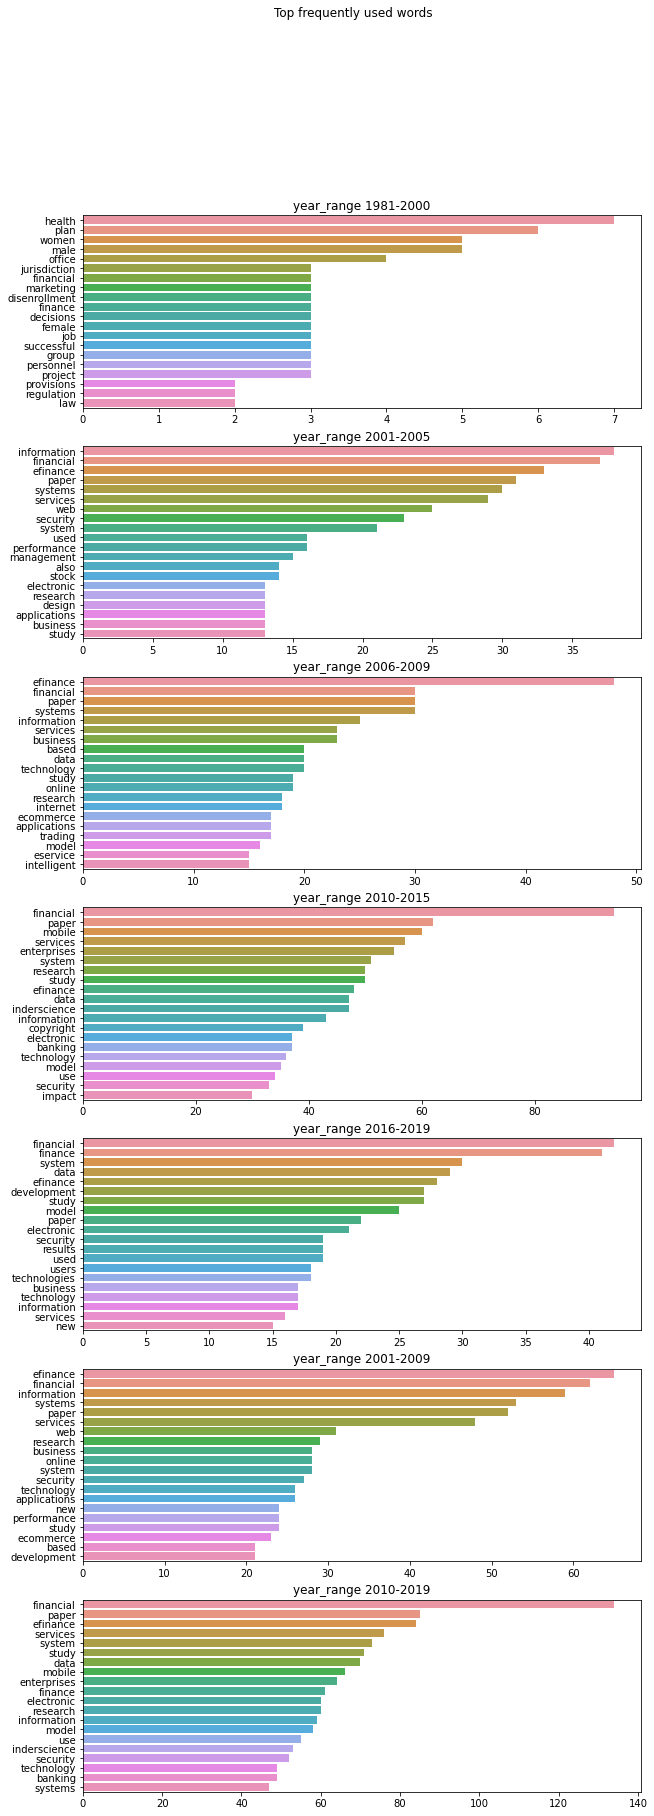

In [16]:
draw_word_frequency(combined_data)

In [20]:
print("We have {} missing values in the Author keywords column".format(df["Author Keywords"].isnull().sum()))
print("\n")
print("We have {} missing values in the Index keywords column".format(df["Index Keywords"].isnull().sum()))

We have 48 missing values in the Author keywords column


We have 127 missing values in the Index keywords column


In [22]:
df.shape[0]

228

We can see that we have about 48 values are missing in the author keywords columns and 127 in the Index keywords column. 
The Index keywords contain more info than the author keywords column. We could fill in the missing values in the Index keywords column with the keywords we have in the index keywords.

In [23]:
df['Index Keywords'] = df.apply(
    lambda row: row['Author Keywords'] if pd.isnull(row['Index Keywords']) else row['Index Keywords'],
    axis=1
)

In [24]:
df["Index Keywords"].head()

0    Cryptography; Data privacy; Economic and socia...
1    analytical hierarchy process; industrial enter...
2    Blockchain; Boron carbide; Commerce; Internet ...
3    Cerebral palsy; Developmental transition; Disa...
4    E-finance; economic growth; financial developm...
Name: Index Keywords, dtype: object

In [25]:
df["Index Keywords"] = df["Index Keywords"].astype(str)
df["Index Keywords"].head()

0    Cryptography; Data privacy; Economic and socia...
1    analytical hierarchy process; industrial enter...
2    Blockchain; Boron carbide; Commerce; Internet ...
3    Cerebral palsy; Developmental transition; Disa...
4    E-finance; economic growth; financial developm...
Name: Index Keywords, dtype: object

In [26]:
def clean_keywords(row, stopwords):
    """Pre-process row and generate word tokens

    Args:
        row: Text to tokenize.

    Returns:
        Tokenized row.
    """
    row = str(row).lower()  # Lowercase words
    tokens = row.split(";")
    tokens = [t.lstrip() for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    return tokens

In [27]:
df["Index Keywords"] = df["Index Keywords"].map(lambda x: clean_keywords(x, stopwords))
df["Index Keywords"].head()

0    [cryptography, data privacy, economic and soci...
1    [analytical hierarchy process, industrial ente...
2    [blockchain, boron carbide, commerce, internet...
3    [cerebral palsy, developmental transition, dis...
4    [e-finance, economic growth, financial develop...
Name: Index Keywords, dtype: object

In [28]:
keywords_corpus = df["Index Keywords"].sum()

In [29]:
len(keywords_corpus)

2028

In [34]:
def draw_word_frequency2(year_range, Keywords):
    """Draw a freuency graph for the words that we have in each year range

    Args:
        year_range: The intended year range in string format
        Keywords: The text document we are drawning a word frequency graph for

    Returns:
        A bar plot
    """
    counter = Counter(Keywords)
    most = counter.most_common()

    x, y= [], []
    for word, count in most[:25]:
        x.append(word)
        y.append(count)
    plt.title(year_range)        
    sns.barplot(x=y, y=x)

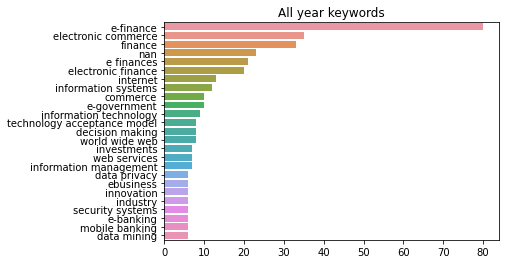

In [35]:
draw_word_frequency2("All year keywords", keywords_corpus)

We could Train a Word2vec model on the abstracts and find the most similar words to the top keywords we have from all the years has seen above